## KNN(K-Nearest-Neighbor)

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = sns.load_dataset('titanic')
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [4]:
pd.set_option('display.max_columns',15)
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [5]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
rdf = df.drop(['deck','embark_town'],axis=1)
print(rdf.columns.values)
print('\n')

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'alive' 'alone']




In [7]:
rdf.isna().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
alive           0
alone           0
dtype: int64

In [ ]:
rdf['age'].fillna(rdf['age'].dropna().median(),inplace=True)
rdf['age'].isna().sum()

In [17]:
rdf  = rdf.dropna(subset=['age'],how='any',axis=0)
rdf.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [10]:
rdf[(rdf['sex'] == 'male')&rdf['age']<30].corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [12]:
tmp = rdf[rdf['pclass']==2]

tmp[(tmp['sex'] == 'male')&(tmp['age']<30)].corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,NaN,-0.883493,0.302318,0.665392,0.069790,-0.936117,-0.525169
pclass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,-0.883493,NaN,1.000000,-0.298291,-0.659491,-0.144806,0.917501,0.487331
sibsp,0.302318,NaN,-0.298291,1.000000,0.344711,0.438113,-0.350183,-0.802203
parch,0.665392,NaN,-0.659491,0.344711,1.000000,0.210574,-0.723113,-0.696358
fare,0.069790,NaN,-0.144806,0.438113,0.210574,1.000000,-0.111388,-0.391154
adult_male,-0.936117,NaN,0.917501,-0.350183,-0.723113,-0.111388,1.000000,0.590788
alone,-0.525169,NaN,0.487331,-0.802203,-0.696358,-0.391154,0.590788,1.000000


In [13]:
tmp.describe()

,survived,pclass,age,sibsp,parch,fare
count,184.000000,184.0,173.000000,184.000000,184.000000,184.000000
mean,0.472826,2.0,29.877630,0.402174,0.380435,20.662183
std,0.500623,0.0,14.001077,0.601633,0.690963,13.417399
min,0.000000,2.0,0.670000,0.000000,0.000000,0.000000
25%,0.000000,2.0,23.000000,0.000000,0.000000,13.000000
50%,0.000000,2.0,29.000000,0.000000,0.000000,14.250000
75%,1.000000,2.0,36.000000,1.000000,1.000000,26.000000
max,1.000000,2.0,70.000000,3.000000,3.000000,73.500000


In [18]:
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
print(most_freq)
print('\n')
print(rdf.describe(include='all'))
print('\n')
rdf['embarked'].fillna(most_freq,inplace=True)

S


          survived      pclass   sex         age       sibsp       parch  \
count   714.000000  714.000000   714  714.000000  714.000000  714.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   453         NaN         NaN         NaN   
mean      0.406162    2.236695   NaN   29.699118    0.512605    0.431373   
std       0.491460    0.838250   NaN   14.526497    0.929783    0.853289   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    1.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    2.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    1.000000   
max       1.000000    3.000000   NaN   80.000000    5.000000    6.000000   

              fare embarked  class  who adult_male alive alone  
count   714.000000

C:\Users\igksj\anaconda3\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [19]:
ndf = rdf[['survived','pclass','sex','age','sibsp','parch','embarked']]
print(ndf.head())

   survived  pclass     sex   age  sibsp  parch embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S


In [20]:
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf,onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf,onehot_embarked],axis=1)

ndf.drop(['sex','embarked'],axis=1,inplace=True)
print(ndf.head())

   survived  pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0         0       3  22.0      1      0       0     1       0       0       1
1         1       1  38.0      1      0       1     0       1       0       0
2         1       3  26.0      0      0       1     0       0       0       1
3         1       1  35.0      1      0       1     0       0       0       1
4         0       3  35.0      0      0       0     1       0       0       1


In [24]:
X = ndf[['pclass','age','sibsp','parch','female','male','town_C','town_Q','town_S']]
y = ndf['survived']

In [22]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=10)

print('train_data_개수:', X_train.shape)
print('test_data_개수:', X_test.shape)

train_data_개수: (499, 9)
test_data_개수: (215, 9)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import  metrics
for i in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    knn_report = metrics.classification_report(y_test,y_hat)
    print(knn_report)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       125
           1       0.81      0.68      0.74        90

    accuracy                           0.80       215
   macro avg       0.80      0.78      0.79       215
weighted avg       0.80      0.80      0.80       215



## SVM(support vector machine)

### SVM으로 분석하는 이미지
- 예전에 비정형데이터를 분석하는 방법(턴서플로우가 나오기 전)

In [31]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [34]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [39]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

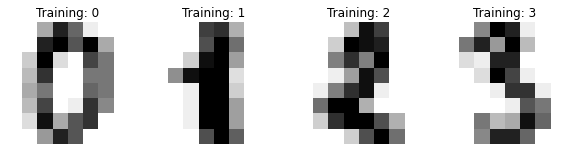

In [38]:
# digit은 이미지 데이터와 레이블 데이터가 들어있음
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

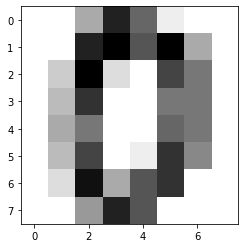

In [37]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)

In [40]:
import numpy as np

In [42]:
print(len(digits.target), len(digits.images))

np.shape(digits.target), np.shape(digits.images)

1797 1797


((1797,), (1797, 8, 8))

In [43]:
# 모든 머신러닝은 가로*세로를 이해하지 못함.
# 가로*세로값을 가로로 모두 변경해야함 ex) 8*8 -> x1,x2...x64의 x변수를 제작함.
n_sample = len(digits.images)
data = digits.images.reshape((n_sample,-1)) # (1797,8,8) -> (1797,64)
data.shape

(1797, 64)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data,digits.target,test_size=0.5,shuffle=False)

clf = svm.SVC(gamma=0.001)
clf.fit(X_train,y_train)
predicted = clf.predict(X_test)
predicted[:3]

array([8, 8, 4])

In [45]:
X_test[0].reshape(8,8).shape

(8, 8)

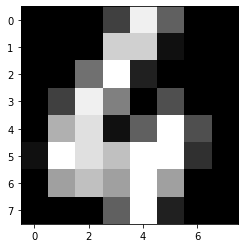

In [48]:
cnt = 2
tmp = X_test[cnt].reshape(8,8)
plt.imshow(tmp,cmap='gray')

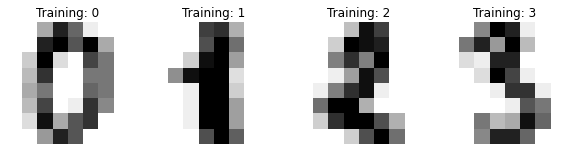

In [49]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

(8, 8)
255 184


array([1])

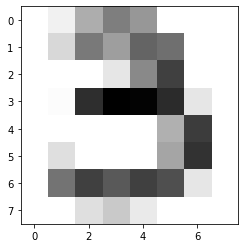

In [52]:
from PIL import Image
img=Image.open('C:/Users/igksj/Pictures/Saved Pictures/숫자3.png')
img=img.convert('L') # 흑백 변환
img=img.resize((8,8)) # 사이즈 맞춤
arr=np.array(img) # 배열로 변환
print(arr.shape)

print(arr.max(), arr.min())

plt.imshow(arr,cmap='gray')
newX=arr.reshape(1,-1)

clf.predict(newX)

### SVM 교재 내용

In [27]:
import pandas as pd
import seaborn as sns

In [28]:
df = sns.load_dataset('titanic')

pd.set_option('display.max_columns',15)

In [29]:
rdf = df.drop(['deck','embark_town'],axis=1)

In [30]:
rdf = rdf.dropna(subset=['age'],how='any',axis=0)

In [ ]:
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
rdf['embarked'].fillna(most_freq,inplace=True)